In [1]:
%reload_ext autoreload
%autoreload 2

In [9]:
import numpy as np
from dateutil import parser
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt

import glob
# import plotly.express as px

In [227]:
from manofunkcijos import *

In [18]:
dat_failai = glob.glob('DATA/OOP_DATA/*.dat')

In [185]:
dat_failai

['DATA/OOP_DATA\\REF_D_1k_FW_2.08.dat',
 'DATA/OOP_DATA\\REF_D_2k_FW_2.05.dat',
 'DATA/OOP_DATA\\REF_D_3k_FW_2.03.dat',
 'DATA/OOP_DATA\\REF_D_4k_FW_2.05.dat',
 'DATA/OOP_DATA\\REF_D_5k_FW_2.05.dat',
 'DATA/OOP_DATA\\REF_D_5k_FW_2.07.dat',
 'DATA/OOP_DATA\\V1145_A_1k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_A_2k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_A_3k_FW_2.05.dat',
 'DATA/OOP_DATA\\V1145_A_4k_FW_2.07.dat',
 'DATA/OOP_DATA\\V1145_A_5k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_A_6k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_A_7k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_1k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_2k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_3k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_4k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_5k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_6k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_7k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1145_B_8k_FW_2.05.dat',
 'DATA/OOP_DATA\\V1177_C_1k_FW_2.05.dat',
 'DATA/OOP_DATA\\V1177_C_2k_FW_2.03.dat',
 'DATA/OOP_DATA\\V1177_C_3k_FW_2.03.dat',
 'DA

In [82]:
medziagos = []
for failas in dat_failai:
    m= failas.split('\\')[-1].split('_')[0]
    medziagos.append(m)
medziagos = list(set(medziagos))
print(medziagos)

['REF', 'V1178', 'V1177', 'V1145', 'V1179']


In [28]:
# surastus dydzius deti i saraša, o tuos sąrašus laikyti atitinkamuose žodynuose
pce_dict = dict.fromkeys(medziagos, [])
print(pce_dict)

{'REF': [], 'V1178': [], 'V1177': [], 'V1145': [], 'V1179': []}


In [ ]:
# pseudo kodas:
m = failas.split('_')[0]
pce_list = pce_dict[m]
pce_list.append(pce)


In [ ]:
# paprastasis budas - 20 kintamuju sarasu kiekvienam parametrui
pce_ref = []
pce_v1145 = []

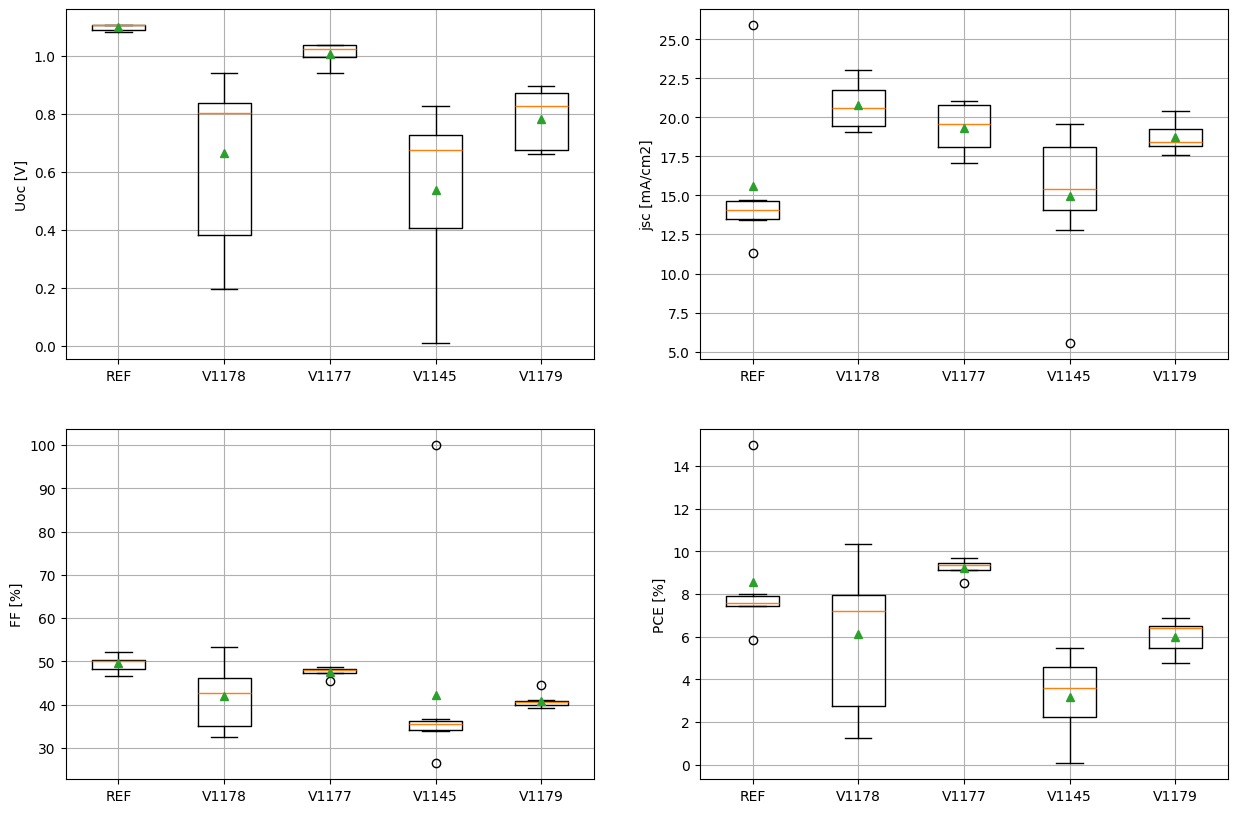

In [140]:
medziagos = []
pce = []
FF = []
Uoc = []
jsc = []  


for failas in dat_failai:
    a = SolarAnalyzer(failas)
    m= failas.split('\\')[-1].split('_')[0]
    medziagos.append(m)
    pce.append(a.pce())
    FF.append(a.FF())
    Uoc.append(a.Uoc())
    jsc.append(a.jsc())
medziagos2 = list(set(medziagos))
pce_dict = dict.fromkeys(medziagos, None)
for i in pce_dict.keys():
    pce_dict[i] = []
ff_dict = dict.fromkeys(medziagos, None)
for i in ff_dict.keys():
    ff_dict[i] = []
uoc_dict = dict.fromkeys(medziagos, None)
for i in uoc_dict.keys():
    uoc_dict[i] = []
jsc_dict = dict.fromkeys(medziagos, None)
for i in jsc_dict.keys():
    jsc_dict[i] = []



for medz,pce1,ff,uoc,JSC in zip (medziagos,pce,FF,Uoc,jsc):           
    pce_dict[medz].append(pce1)
    ff_dict[medz].append(ff)
    uoc_dict[medz].append(uoc)
    jsc_dict[medz].append(JSC)

            
fig, axes = plt.subplots(2,2, figsize = [15,10])

axes[0,0].boxplot(uoc_dict.values(), showmeans = True)
axes[0,0].set_xticklabels(medziagos2)
axes[0,0].set_ylabel('Uoc [V]')
axes[0,0].grid()
axes[0,1].boxplot(jsc_dict.values(), showmeans = True)
axes[0,1].set_xticklabels(medziagos2)
axes[0,1].set_ylabel('jsc [mA/cm2]')
axes[0,1].grid()
axes[1,0].boxplot(ff_dict.values(), showmeans = True)
axes[1,0].set_xticklabels(medziagos2)
axes[1,0].set_ylabel('FF [%]')
axes[1,0].grid()
axes[1,1].boxplot(pce_dict.values(), showmeans = True)
axes[1,1].set_xticklabels(medziagos2)
axes[1,1].set_ylabel('PCE [%]')
axes[1,1].grid()


plt.show()
    
    

In [ ]:
medziagos = []
for failas in dat_failai:
    m= failas.split('\\')[-1].split('_')[0]
    medziagos.append(m)
medziagos = list(set(medziagos))
print(medziagos)

['REF', 'V1178', 'V1177', 'V1145', 'V1179']


In [135]:
fname = 'DATA/OOP_DATA\\REF_D_1k_FW_2.08.dat'
f = open(fname, mode='r', encoding='utf-8')
lines = f.readlines()
f.close()
uv = []
ia = []
j = []
p = []
for line in lines[1:]:
    r = line.split(';')
    uvi = float(r[0])
    iai = float(r[1])
    ji = float(r[2])
    pi = float(r[3])
    uv.append(uvi)
    ia.append(iai)
    j.append(ji)
    p.append(pi)
print(min(uv))
x = []
for i in uv:
    x.append(abs(i-0))
print('Skaičius',uv[x.index(min(x))],'indeksas',x.index(min(x)))

-0.2
Skaičius 0.01 indeksas 51


In [136]:
mpar = dict.fromkeys(medziagos, None)
# print(mpar)
for i in mpar.keys():
    mpar[i] = []
print(mpar)

{'REF': [], 'V1145': [], 'V1177': [], 'V1178': [], 'V1179': []}


In [211]:
a = columns('C:/Users/manta/OneDrive/Dokumentai/Python projektai/DataScienceNotebooks/Studentai/MantasD/DATA/Suminiai[2021-07 - 2024-07].csv')
print(a.Columns())
print(col_1)

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11']
[0.0016303, 0.0014972, 0.001383, 0.0012771, 0.0011799, 0.0010898, 0.0010051, 0.0009238, 0.0008442, 0.0007697, 0.0006986, 0.0006288, 0.0005617, 0.0004949, 0.0004291, 0.0003651, 0.0003022, 0.0002385, 0.0001772, 0.0001161, 5.6e-05, 4.1e-06, -6.12e-05, -0.00012, -0.0001786, -0.0002351, -0.0002907, -0.0003427, -0.0003953, -0.0004434, -0.0004936, -0.0005394, -0.0005865, -0.0006248, -0.0006666, -0.000702, -0.0007353, -0.000771, -0.0007999, -0.0008305, -0.0008545, -0.0008793, -0.0009002, -0.0009214, -0.0009386, -0.0009581, -0.0009751, -0.0009871, -0.000995, -0.0010061, -0.001017, -0.0010283, -0.0010416, -0.0010482, -0.0010622, -0.0010695, -0.001078, -0.0010879, -0.0011034, -0.0011162]


In [142]:
# https://www.geeksforgeeks.org/python-program-to-create-dynamically-named-variables-from-user-input/
# Dynamic_Variable_Name can be
# anything the user wants
Dynamic_Variable_Name = "geek"

# The value 2020 is assigned
# to "geek" variable
globals()[Dynamic_Variable_Name] = 2020

# Display variable
print(geek)


2020


In [256]:

def col(fname, sep=';') -> None:
    fname= fname
    sep
    __columns = []
       
        
  
    f = open(fname, mode='r', encoding='utf-8')
    line = f.readline()
    lines = f.readlines()
    f.close()
    names = line.split(sep)
    n = len(names)
    x = 0
    for i in range(n):
        globals()[f"col_{i}"] = []
        __columns.append(f"col_{i}")
        for line in lines[1:]:
            r = line.split(';')
            globals()[f"col_{i}"].append(r[x])
        x = x + 1
    pavadinimai = []
    for a, b in zip(names, __columns):
        pavadinimai.append(a+" priskirtas stulpeliui "+b)
    return pavadinimai

col('DATA/OOP_DATA\\REF_D_1k_FW_2.08.dat')



['U[V]  priskirtas stulpeliui col_0',
 ' I[A]  priskirtas stulpeliui col_1',
 ' j[mA/cm^2]  priskirtas stulpeliui col_2',
 ' P[mW/cm^2]\n priskirtas stulpeliui col_3']

In [258]:
col_0

['1.1766667 ',
 '1.1533333 ',
 '1.13 ',
 '1.1066667 ',
 '1.0833333 ',
 '1.06 ',
 '1.0366667 ',
 '1.0133333 ',
 '0.99 ',
 '0.9666667 ',
 '0.9433333 ',
 '0.92 ',
 '0.8966667 ',
 '0.8733333 ',
 '0.85 ',
 '0.8266667 ',
 '0.8033333 ',
 '0.78 ',
 '0.7566667 ',
 '0.7333333 ',
 '0.71 ',
 '0.6866667 ',
 '0.6633333 ',
 '0.64 ',
 '0.6166667 ',
 '0.5933333 ',
 '0.57 ',
 '0.5466667 ',
 '0.5233333 ',
 '0.5 ',
 '0.4766667 ',
 '0.4533333 ',
 '0.43 ',
 '0.4066667 ',
 '0.3833333 ',
 '0.36 ',
 '0.3366667 ',
 '0.3133333 ',
 '0.29 ',
 '0.2666667 ',
 '0.2433333 ',
 '0.22 ',
 '0.1966667 ',
 '0.1733333 ',
 '0.15 ',
 '0.1266667 ',
 '0.1033333 ',
 '0.08 ',
 '0.0566667 ',
 '0.0333333 ',
 '0.01 ',
 '-0.0133333 ',
 '-0.0366667 ',
 '-0.06 ',
 '-0.0833333 ',
 '-0.1066667 ',
 '-0.13 ',
 '-0.1533333 ',
 '-0.1766667 ',
 '-0.2 ']